In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
#sys.path.append()
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
cm=2.54
def real_to_relative(fig,rect):#inches as input
    fig_width,fig_height=fig.get_size_inches()
    width=rect[2]
    height=rect[3]
    properties=[rect[0]/fig_width,rect[1]/fig_height,width/fig_width,height/fig_height]
    return properties

def fig_setup(width,height,style,dpi):#input cm
    """
    :param width: figure width in cm
    :param height: figure height in cm
    :return: matplotlib figure
    """
    cm=2.54
    import matplotlib.pyplot as plt
    #plt.style.use(style)
    figure=plt.figure(figsize=(width/cm,height/cm),dpi=dpi)
    return figure

def ax_setup(fig,margin_left,margin_bottom,boxwidth,boxheight):#cm input
    fig_width,fig_height=fig.get_size_inches()
    #width=(fig_width*cm)-margin_left-margin_right
    #height=(fig_height*cm)-margin_top-margin_bottom
    position_size=[margin_left/cm,margin_bottom/cm,boxwidth/cm,boxheight/cm]#inch
    axis=fig.add_axes(real_to_relative(fig,position_size))
    return axis

def subplots(figsize=(12,8), marginleft=1, marginbottom=1, databox_width=16, databox_height=5, style=None,dpi=120):#input cm
    fig=fig_setup(figsize[0],figsize[1],style,dpi=dpi)
    ax=ax_setup(fig, marginleft, marginbottom, databox_width, databox_height)
    return fig,ax

def mult_save(fig,path,name):
    pgf=path+name+'.pgf'
    png=path+name+'.png'
    svg=path+name+'.svg'

    fig.savefig(pgf)
    fig.savefig(png,dpi=1000)
    fig.savefig(svg)


In [3]:
path=r"Y:\Istra Repositories\ch-gr_exports"
_8mmGW=pd.read_pickle(os.path.join(path,'MC_A_8xiii_clipped_cut.pickle'),compression='zip')
_8mmSG=pd.read_pickle(os.path.join(path,'QL_A_8xii_clipped_cut.pickle'),compression='zip')
_6mmSG=pd.read_pickle(os.path.join(path,'QL_A_6xiii_clipped_cut.pickle'),compression='zip')



In [4]:
display(_8mmSG,_6mmSG,_8mmGW)

group                                                              add_data  \
dataset                                                     analog_channels   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.08598930597714943]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.13070658454974954]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.18035591695952644]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.22967644701834133]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...   [[0.2783393712351253]]   
...                                                                     ...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...    [[4.022434976427613]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...    [[4.022106170682388]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...    [[4.022106170682388]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...    [[4.020790947704758]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...    [[4.019475724732361]]   

group                                                                                     coordinates  \
dataset                                                                                  coordinate_x   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

group                                                                                                  \
dataset                                                                                  coordinate_y   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_8xii\s...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

group                                                                                                  \
dataset                                                                                  coordinate_z   
Y:\Istra Repositories\ch-gr_ex

group                                                              add_data  \
dataset                                                     analog_channels   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...   [[0.1083479451550233]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.14813317129194756]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.19054882640638196]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.23296448239918488]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.27406492513833136]]   
...                                                                     ...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...   [[2.2771381021223833]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...   [[2.2754940804228054]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...   [[2.2728636457139872]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...    [[2.269904406682011]]   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...    [[2.266945167666371]]   

group                                                                                     coordinates  \
dataset                                                                                  coordinate_x   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

group                                                                                                  \
dataset                                                                                  coordinate_y   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\QL_A_6xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

group                                                                                                  \
dataset                                                                                  coordinate_z   
Y:\Istra Repositories\ch-gr_ex

group                                                              add_data  \
dataset                                                     analog_channels   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.10440230293161674]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...    [[0.152407617117844]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.20205695003641347]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...   [[0.2526926948022935]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.30102681607107595]]   
...                                                                     ...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...   [[3.3963894031650916]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...    [[3.385867638025645]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...   [[3.3746882628809125]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...   [[3.3641664983353463]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...   [[3.3529871238198696]]   

group                                                                                     coordinates  \
dataset                                                                                  coordinate_x   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

group                                                                                                  \
dataset                                                                                  coordinate_y   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii\...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

group                                                                                                  \
dataset                                                                                  coordinate_z   
Y:\Istra Repositories\ch-gr_ex

In [5]:
display(_8mmSG.columns)

MultiIndex([(     'add_data',    'analog_channels'),
            (  'coordinates',       'coordinate_x'),
            (  'coordinates',       'coordinate_y'),
            (  'coordinates',       'coordinate_z'),
            ('displacements', 'displacement_total'),
            (      'strains',          'strain_p1'),
            (      'strains',          'strain_p2'),
            (      'strains',          'strain_xx'),
            (      'strains',          'strain_xy'),
            (      'strains',          'strain_yy')],
           names=['group', 'dataset'])

In [11]:
df=_8mmSG
force8SG=[i[0][0]*60000/200 for i in df.loc[:,(     'add_data',             'analog_channels')]]
p10=np.nanmean(np.nanmean(df.loc[df.index[0],(      'strains',                   'strain_p1')]))
strain8SG=[np.nanmean(np.nanmean(i))-p10 for i in df.loc[:,(      'strains',                   'strain_p1')]]

In [12]:
df=_6mmSG
force6SG=[i[0][0]*60000/120 for i in df.loc[:,(     'add_data',             'analog_channels')]]
p10=np.nanmean(np.nanmean(df.loc[df.index[0],(      'strains',                   'strain_p1')]))
strain6SG=[np.nanmean(np.nanmean(i))-p10 for i in df.loc[:,(      'strains',                   'strain_p1')]]

In [13]:
df=_8mmGW
force8GW=[i[0][0]*60000/200 for i in df.loc[:,(     'add_data',             'analog_channels')]]
p10=np.nanmean(np.nanmean(df.loc[df.index[0],(      'strains',                   'strain_p1')]))
strain8GW=[np.nanmean(np.nanmean(i))-p10 for i in df.loc[:,(      'strains',                   'strain_p1')]]

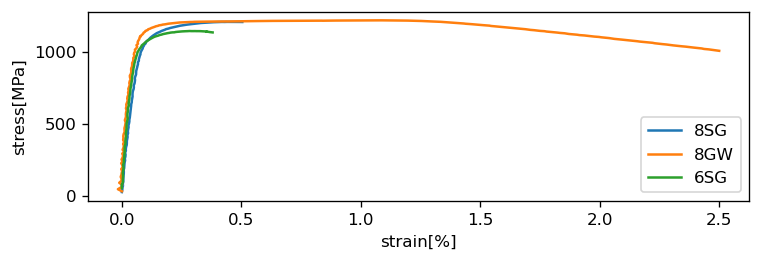

In [16]:
fig, ax=subplots((16,5),1.5,1,14,4)

ax.plot([i*100 for i in strain8SG],force8SG,label='8SG')
ax.plot([i*100 for i in strain8GW],force8GW,label='8GW')
ax.plot([i*100 for i in strain6SG],force6SG,label='6SG')
ax.set_xlabel('strain[%]')
ax.set_ylabel('stress[MPa]')
ax.legend()

_8mmSG


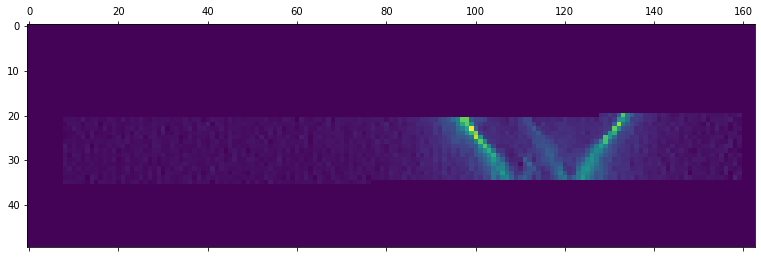

-------------------------------
_6mmSG


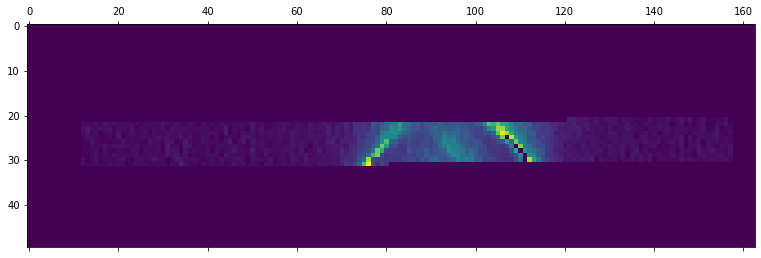

-------------------------------
_8mmGW


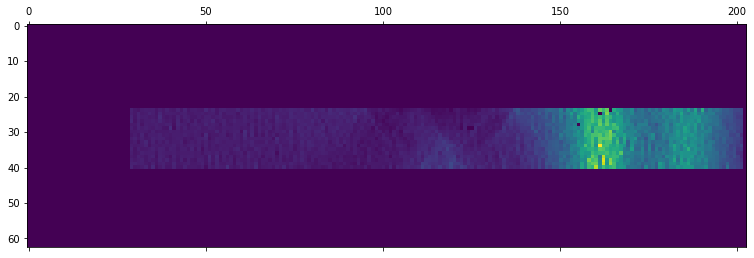

In [23]:
print('_8mmSG')
plt.matshow(_8mmSG.loc[_8mmSG.index[-1],('strains','strain_p1')])
plt.show()
print('-------------------------------')
print('_6mmSG')
plt.matshow(_6mmSG.loc[_6mmSG.index[-1],('strains'
,'strain_p1')])
plt.show()
print('-------------------------------')
print('_8mmGW')
plt.matshow(_8mmGW.loc[_8mmGW.index[-1],('strains'
,'strain_p1')])
plt.show()